In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [202]:
df = pd.read_csv('titanic_train.csv')

In [203]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [204]:
df = df.dropna(axis=0)

In [205]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


In [206]:
df = df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [207]:
target = df['Survived'].copy()

In [208]:
features = df.drop(['Survived'],axis=1).copy()

In [209]:
features['Sex'] = features['Sex'].replace(['male','female'],[1,0])
features['Embarked'] = features['Embarked'].replace(['C','S'],[1,0])

In [210]:
features = features.select_dtypes(include=['int32','int64','float32','float64'])

In [212]:
target = np.array(target)
target = target.reshape(1,183)

In [213]:
print('Shape of target :',target.shape)
print('Shape of Features :',features.shape)

Shape of target : (1, 183)
Shape of Features : (183, 6)


In [214]:
#Defining Functions
def ex(m,x,c):
    return np.dot(m,x.T)+c
def sigmoid(m,x,c):
    return 1/(1+np.exp(-(ex(m,x,c))))
def error(m,x,c,y):
    return np.mean((sigmoid(m,x,c)-y)**2)
def der_slopes(m,x,c,y):
    der_slope=2*np.mean(((sigmoid(m,x,c)-y)*(np.multiply(((1+np.exp(-(ex(m,x,c))))*(np.exp(-(ex(m,features,c))))),x.T))),axis=1)
    der_slope = np.array(der_slope)
    der_slope = der_slope.reshape(1,6)
    return der_slope
def der_intercept(m,x,c,y):
    der_int = 2*np.mean((sigmoid(m,x,c)-y)*(1+np.exp(-(ex(m,x,c))))*np.exp(-(ex(m,x,c))))
    return der_int
def accuracy(m,x,c,y):
    return 100 - ((error(m,x,c,y)/np.mean(y**2))*100)

In [215]:
m = np.random.randn(1,6)
c = random.random()

Error : 0.32786885245901637
Accuracy : 51.21951219512195
Iteration : 9


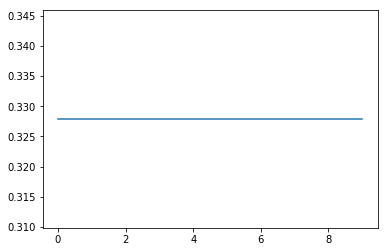

In [226]:

it = 10
cost=[]
lr = 0.00000000001
for i in range(it):
    m = m - lr*der_slopes(m,features,c,target)
    c = c - lr*der_intercept(m,features,c,target)
    clear_output(True)
    cost.append(error(m,features,c,target))
    print('Error :',error(m,features,c,target))
    print('Accuracy :',accuracy(m,features,c,target))
    print('Iteration :',i)
plt.plot(cost)
plt.show()